In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob



In [17]:
class unfold_file():
     def __init__(self):
        """ define data"""
        self.file_name = ""
        self.num = 0
        self.location = ""
        self.dose_rate = 0
        self.thermal = 0
        self.epi = 0
        self.fast = 0
        self.ebins = None
        self.spec = None
        self.count_D1 = 0
        self.count_D2 = 0
        self.count_D3 = 0
        self.count_D4 = 0
        self.count_D5 = 0
        self.count_D6 = 0
        self.count_F = 0
        self.count_FL = 0
        self.count_FR = 0
        self.count_R = 0
        self.count_RR = 0
        self.count_RL = 0
        self.count_time = 0
        self.phi = 0
        
    

In [18]:
# set of functions for string cleaning

def clean_param(line):
    line = line.split(":")[1]
    line = clean(line)
    return float(line[0])

def clean_counts(line):
    line = clean(line)
    return int(line[1]), int(line[3])

def clean(line):
    line = line.strip()
    line = " ".join(line.split())
    line = line.split()
    return line
    

In [19]:
def read_unfold_file(path):

    results = unfold_file()
    results.file_name = path
    
    with open(path) as f:
        lines = f.read().splitlines()
    f.close()
    
    in_spect = False
    
    for line in lines:
        if " thermal" in line:
            line = clean_param(line)
            results.thermal = line
        elif "epi" in line:
            line = clean_param(line)
            results.epi = line
        elif "fast" in line:
            line = clean_param(line)
            results.fast = line
        elif "phi" in line:
            line = clean_param(line)
            results.phi = line
        elif "H*(10)_r" in line:
            line = clean_param(line)
            results.dose_rate = line
        elif "D1" in line:
            results.count_D1, results.count_R = clean_counts(line)
        elif "D2" in line:
            results.count_D2, results.count_RL = clean_counts(line)
        elif "D3" in line:
            results.count_D3, results.count_FL = clean_counts(line)
        elif "D4" in line:
            results.count_D4, results.count_F = clean_counts(line)
        elif "D5" in line:
            results.count_D5, results.count_FR = clean_counts(line)
        elif "D6" in line:
            results.count_D6, results.count_RR = clean_counts(line)
        elif "TIME" in line:
            line = clean_param(line)
            results.count_time = float(line)
        
        elif in_spect:
            line = clean(line)
            if len(line)<1:
                break
            results.ebins.append(float(line[0]))
            results.spec.append(float(line[-1]))
            
        elif "2.000E-09" in line:
            in_spect = True
            results.ebins = [2e-9]
            line = clean(line)
            results.spec=[float(line[-1])]


    return results

In [20]:
def plot_spect(data):
    
    plt.xscale("log")
    plt.step(data.ebins, data.spec, label=data.num )
    plt.legend()
    plt.savefig("spect.png")
    

In [21]:
def convert_to_ds(data):
    labels = ("file_name", "num", "location", "dose_rate", "thermal","epi", "fast",
              "D1", "D2", "D3", "D4", "D5", "D6", "F", "FL", "FR", "R", "RR", "RL", "time", "phi")
    
    data_list = [data.file_name, data.num, data.location, data.dose_rate, data.thermal, data.epi, data.fast, 
                data.count_D1, data.count_D2, data.count_D3, data.count_D4, data.count_D5, data.count_D6,
                data.count_F, data.count_FL, data.count_FR, data.count_R, data.count_RR, data.count_RL,
                data.count_time, data.phi]
    
    s1 = pd.Series(data_list, index=labels)
    
    return s1


,file_name,num,location,dose_rate,thermal,epi,fast,D1,D2,D3,...,D5,D6,F,FL,FR,R,RR,RL,time,phi
0,C:\work\detectors\diamon\DIAMON_0193200001_all...,0004,,0.022,0.7339,0.1156,0.1505,30,21,21,...,9,9,20,12,14,18,13,19,3593.29,0.100
1,C:\work\detectors\diamon\DIAMON_0193200001_all...,0005,,2.850,0.4600,0.3587,0.1813,668,737,762,...,516,363,758,486,514,489,694,714,896.93,11.587
2,C:\work\detectors\diamon\DIAMON_0193200001_all...,0006,,1.706,0.4763,0.3503,0.1734,315,333,340,...,229,154,210,266,276,299,271,277,659.27,7.089
3,C:\work\detectors\diamon\DIAMON_0193200001_all...,0007,,5.431,0.3634,0.4027,0.2339,947,1153,1259,...,955,679,1192,964,1057,788,1130,897,897.22,17.978
4,C:\work\detectors\diamon\DIAMON_0193200001_all...,0008,,3.383,0.4348,0.3881,0.1771,733,881,983,...,687,491,1027,726,722,463,794,761,899.63,14.390
5,C:\work\detectors\diamon\DIAMON_0193200001_all...,0009,,2.719,0.3972,0.3972,0.2057,534,664,688,...,486,352,729,416,464,389,677,623,898.74,10.095
6,C:\work\detectors\diamon\DIAMON_0193200001_all...,0010,,2.155,0.4425,0.3566,0.2010,456,484,577,...,420,306,490,338,267,387,586,644,883.22,8.715
7,C:\work\detectors\diamon\DIAMON_0193200001_all...,0012,,5.614,0.4679,0.2843,0.2478,870,963,1009,...,749,574,1115,647,794,542,1007,828,897.70,16.867
8,C:\work\detectors\diamon\DIAMON_0193200001_all...,0013,,2.389,0.4077,0.4239,0.1684,592,656,782,...,547,388,662,502,456,550,666,745,899.39,11.035
9,C:\work\detectors\diamon\DIAMON_0193200001_all...,0014,,2.268,0.4254,0.4207,0.1539,651,752,787,...,515,361,707,479,535,468,722,752,898.96,10.920


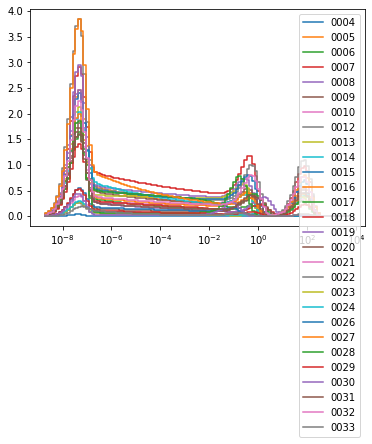

In [22]:
path = "C:\work\detectors\diamon\DIAMON_0193200001_all_OUTS\*"


data_series_list = []

folder_list = glob.glob(path)

for folder in folder_list:
    
    files_list = glob.glob(folder+"\*")
    
    data = read_unfold_file(files_list[1])
    data.num = folder.split("\\")[-1]
    dseries = convert_to_ds(data)
    
    data_series_list.append(dseries)                           
    plot_spect(data)
    
        
df = pd.DataFrame(data_series_list)
df


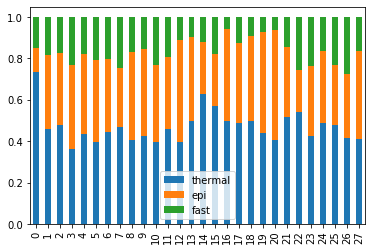

In [124]:
axis = df[["thermal", "epi", "fast"]].plot(kind="bar", stacked=True)
fig = axis.get_figure()

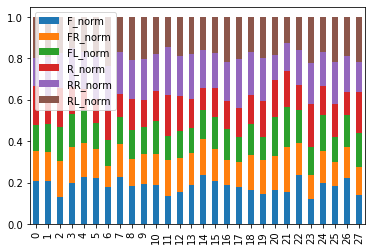

In [130]:
df["sum_dir"] = df[["F", "FR", "FL", "R", "RR", "RL"]].sum(axis=1)
df["F_norm"] = df["F"]/df["sum_dir"]
df["FL_norm"] = df["FL"]/df["sum_dir"]
df["FR_norm"] = df["FR"]/df["sum_dir"]
df["R_norm"] = df["R"]/df["sum_dir"]
df["RL_norm"] = df["RL"]/df["sum_dir"]
df["RR_norm"] = df["RR"]/df["sum_dir"]

axis = df[["F_norm", "FR_norm", "FL_norm", "R_norm", "RR_norm", "RL_norm"]].plot(kind="bar", stacked=True)
fig = axis.get_figure()

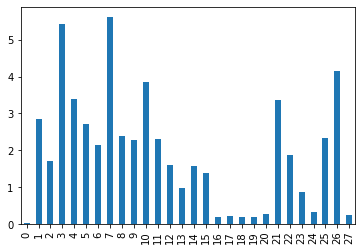

In [131]:
axis = df["dose_rate"].plot(kind="bar")